In [1]:
import tensorflow as tf # tensorflow 2.2+
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with tf.io.gfile.GFile('checkpoint/selfie2anime.tflite', 'rb') as f:
    model_content = f.read()

interpreter = tf.lite.Interpreter(model_content=model_content)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

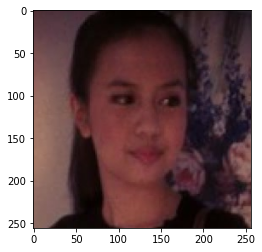

In [21]:
img = cv2.imread('imgs/13.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [22]:
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
input_img = np.expand_dims(img, axis=0).astype(np.float32)

print(input_img.shape)

(1, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


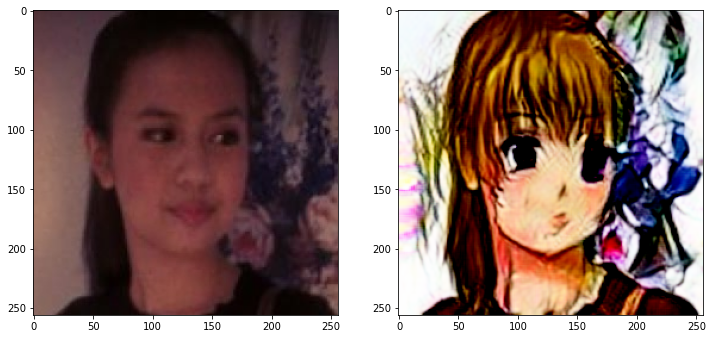

In [23]:
interpreter.set_tensor(input_index, input_img)
interpreter.invoke()

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(img)
axes[1].imshow(output()[0])